# Huggingface + LlamaIndex Agent

This notebook covers a fun example of leveraging LlamaIndex to augment existing tools in Huggingface Agents.

## Dependencies (runtime will restart after install!)

In [ ]:
!pip install --upgrade transformers[agents] openai llama_index

import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.9/459.9 kB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━

## Base HF Agent
This will run the default Huggingface Agent. The default set of tools are listed [on the guide here](https://huggingface.co/docs/transformers/transformers_agents#tools).

In [ ]:
from transformers import OpenAiAgent

# restart the runtime if you get an error "name 'openai' is not defined"
agent = OpenAiAgent(model="text-davinci-003", api_key="your_api_key")

==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
image = image_generator(prompt="Draw me a picture of a mountain.")


==Result==


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/25 [00:00<?, ?it/s]

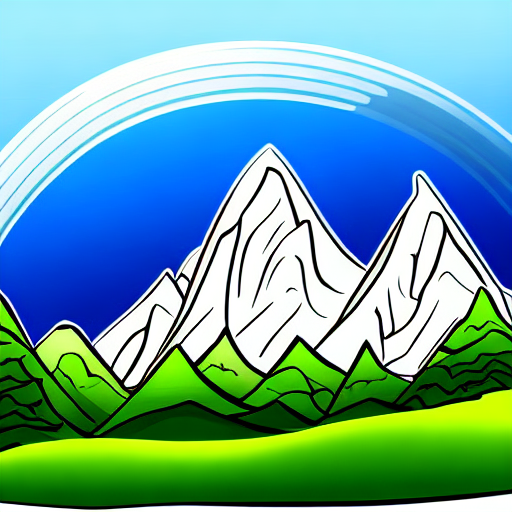

In [ ]:
agent.run("Draw me a picture a mountain.")

## HF Agent w/ LlamaIndex Prompt Assistant

The LlamaIndex Prompt Assistant tool will override the default text-generation tool, and try to craft an improved prompt automatically. The new tool leverages a vector search across 50K random samples from [DiffusionDB](https://huggingface.co/datasets/poloclub/diffusiondb)

In [ ]:
from transformers import load_tool

prompt_assistant = load_tool(
    "llamaindex/text2image_prompt_assistant",
    openai_api_key="your_api_key",
    model_name='text-davinci-003',
    temperature=0.3,  # increase or decrease this to control variation
    verbose=True
)

In [ ]:
from transformers import OpenAiAgent

agent = OpenAiAgent(model="text-davinci-003", api_key="your_api_key")

Override the `image_generator` tool. You can see all existing tools if you do `print(agent.toolbox.keys())`.

In [ ]:
agent.toolbox['image_generator'] = prompt_assistant

Now, run the agent with the new `image_generator` tool!

==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
image = image_generator(prompt="Draw me a picture of a mountain.")


==Result==


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


==New prompt generated by LlamaIndex==
a majestic mountain peak, surrounded by lush greenery, with a stunning sunset in the background 



  0%|          | 0/25 [00:00<?, ?it/s]

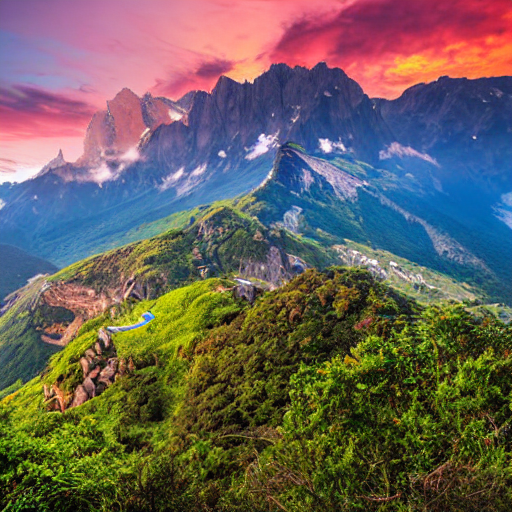

In [ ]:
agent.run("Draw me a picture a mountain.")